<a href="https://colab.research.google.com/github/mlfigueiredo/CienciaDosDados/blob/main/%C3%81rvores_de_Decis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'> Machine Learning - Árvore de decisão</font>


In [1]:
# Visualizar o Grafo (Arvore de decisão é um tipo de Grafo Computacional)
!pip install graphviz 

In [2]:
### Talvez seja necessário executar esse comando (CMD) para o windows
!conda install python-graphviz

# Documentação em http://www.graphviz.org

/bin/bash: conda: command not found


In [3]:
# Importando os módulos
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [22]:
# Criando o dataset
instancias = [
    {'Curado': False, 'Cloroquina': 'sim'},
    {'Curado': True, 'Cloroquina': 'nao'},
    {'Curado': True, 'Cloroquina': 'nao'},
    {'Curado': True, 'Cloroquina': 'nao'},
    {'Curado': False, 'Cloroquina': 'nao'},
    {'Curado': True, 'Cloroquina': 'nao'},
    {'Curado': True, 'Cloroquina': 'nao'},
    {'Curado': False, 'Cloroquina': 'sim'},
    {'Curado': True, 'Cloroquina': 'nao'},
    {'Curado': False, 'Cloroquina': 'sim'},
    {'Curado': False, 'Cloroquina': 'sim'},
    {'Curado': False, 'Cloroquina': 'nao'},
    {'Curado': True, 'Cloroquina': 'nao'},
    {'Curado': True, 'Cloroquina': 'sim'},
]

In [23]:
# Transformando o Ddicionário em DataFrame
df = pd.DataFrame(instancias)

In [24]:
df

,Curado,Cloroquina
0,False,sim
1,True,nao
2,True,nao
3,True,nao
4,False,nao
5,True,nao
6,True,nao
7,False,sim
8,True,nao
9,False,sim


In [25]:
# Preparando os dados de treino 
X_train = [[1] if a else [0] for a in df['Curado']]       
y_train = [1 if d == 'sim' else 0 for d in df['Cloroquina']]
labels = ['Cloroquina']

In [26]:
print(X_train)

[[0], [1], [1], [1], [0], [1], [1], [0], [1], [0], [0], [0], [1], [1]]


In [27]:
print(y_train)

[1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1]


In [28]:
# Construindo o Classificador Baseado em Entropia (Ganho de Informação)
# http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
modelo_v1 = DecisionTreeClassifier(max_depth = None, 
                                   max_features = None, 
                                   criterion = 'entropy', 
                                   min_samples_leaf = 1, 
                                   min_samples_split = 2)

In [29]:
# Apresentando os dados ao Classificador
modelo_v1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [30]:
# Definindo o nome do arquivo com a árvore de decisão
arquivo = '/content/sample_data/tree_modelo_v1.dot'

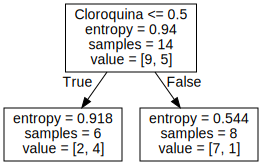

In [31]:
# Gerando o gráfico da árvore de decisão
export_graphviz(modelo_v1, out_file = arquivo, feature_names = labels)
with open(arquivo) as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

O agrupamento com 9 e 5 foi o que apresentou  MELHOR ENTROPIA, portanto maior ganho de informação. Portanto ele fica no TOPO da hierarquia da Decision Tree.
Isso é exatamente o que o algoritmo faz: Ele percorre os exemplos de dados, faz o cálculo da entropia, e então faz a melhor combinação...o atributo que tem a melhor entropia vai para o TOPO....Então ele vai criando os níveis da Árvore...

In [32]:
# Construindo o Classificador Baseado no índice Gini
# http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
modelo_v2 = DecisionTreeClassifier(max_depth = None, 
                                   max_features = None, 
                                   min_samples_leaf = 1, 
                                   min_samples_split = 2)

In [33]:
# Apresentando os dados ao Classificador
modelo_v2.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
# Definindo o nome do arquivo com a árvore de decisão
arquivo = '/content/sample_data/tree_modelo_v2.dot'

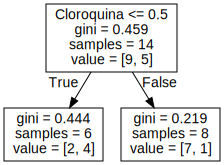

In [35]:
# Gerando o gráfico da árvore de decisão
export_graphviz(modelo_v2, out_file = arquivo, feature_names = labels)
with open(arquivo) as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

O agrupamento com 9 e 5 foi o que apresentou  MELHOR GINI. Portanto ele fica no TOPO da hierarquia da Decision Tree.Isso é exatamente o que o algoritmo faz: Ele percorre os exemplos de dados, faz o cálculo do maior gini, e então faz a melhor combinação...o atributo que tem o maior gini vai para o TOPO....Então ele vai criando os níveis da Árvore...